#Assignment 2:
    test the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson. Use: 
    
    1) KS
    
    2) KL or Chisq
    
    3) AD
    
    6 or 8 tests total
   

In [53]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

#plus importing scipy.stats
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


#TESTING PHASE

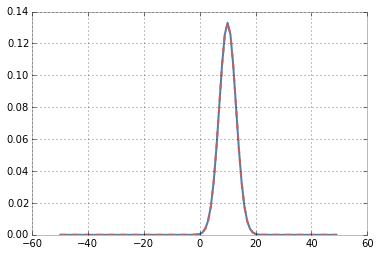

In [59]:
#the next plot is to assure i understand how to use the scipy function stats.norm.pdf 
#and that i understand its arguments. to do that i create a pdf from the formula, which
#i know
x = np.arange(0.,100.)-50


mu = 10.
stdev = 3.
pl.plot(x, scipy.stats.norm.pdf(x, loc = mean, scale = stdev))
pl.plot(x, 1.0 / stdev / np.sqrt(2.0 * np.pi) * np.exp(- 0.5 * (x - mu)*(x - mu) / stdev / stdev), '--')
        

In [61]:
#notice that the first time i did it i used sigma = 1 and 
#assumed that the argument was gonna be the variance, 
#which is the stdev squared, AND I GOT FOOLED!  1 and 0 are 
#always bet values to use for testing...

In [ ]:
#testing the statistical tests for cases where the answer is obvious 

#generate the distribution
dist_n = np.random.randn(1000)

#test ad and ks. those are easy
print "normal on normal", scipy.stats.kstest(dist_n,'norm')
print "normal on normal", scipy.stats.anderson(dist_n, dist='norm')
print "" 

hs, bs, ps = pl.hist(dist_n)
pl.plot(bs[:-1]+0.5*(bs[1]-bs[0]), hs)

pl.figure()
pl.plot(bs[1:], hs.cumsum()/max(hs.cumsum()), 'b')

dist_b = np.random.binomial(1, 0.5, 1000)

print "binomial on normal", scipy.stats.kstest(dist_b,'norm')
print "binomial on normal", scipy.stats.anderson(dist_b, dist='norm')

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold

print scipy.stats.norm.cdf(bs)
pl.plot(bs[1:]-0.5*(bs[1]-bs[0]),scipy.stats.norm.cdf(bs[:-1]+0.5*(bs[1]-bs[0])), 'r--')
##what is this threshold I am saving??

ANSWER TO QUESTION: the threshold i am saving is the critical value for the anderson test that compares 
a normal distribution sample with a normal theoretical function  
at  a significante of alpha = 0.01, so it is a fairly restrictive threshold. 
it is NOT the threshold for all tests, since the test critical value depends on the 
size of the sample

the statistics value will be **larger** if the distributions are **not** likely to be related. 
think about this in terms of rejection of the NULL hypothesis. 

##try writing down the null for each test and see if scipy manual agrees with you         (the manual spells out the Null)

##THIS PART IS REQUESTED IN THE INSTRUCTIONS SO THESE STATEMENTS WILL BE GRADED

The null hypothesis for the KS test is that the distribution come from the same parent distributions


The null distribution for the AD test is that the distributions are related (under impolicit assumptions of gaussianity)


There is no Null for the KL divergence: the KL divergence is a measure of the loss of informatio when one distribution si approximated with another one

The Null for the chi sq test is that the categorical data has the frequency  expected to be produced by the theoretical distribution (in each category you have the expected fraction of the sample) 

In [70]:
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
#notice the extra comma on the left side of the '=' sign: that tells numpy take the first two values returned, and throw away the rest


then i have to pass it the functional form of a normal PDF, which is returned by the function scipy.stats.norm for example (a google search would have told you!) 
evaluated at the bin centers of the histogram from before

#BINOMIAL

In [140]:
#to store the data i am generating an empty array of the size of the values of n i want to test. i do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, but default is float, which is fine by me, so i do not need any argument other then the lenght 
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))
#i may want to get the p values from the tests that provide: the chisq for example

chi2_pv_b = np.zeros(len(narray))

In [141]:
## this is the function that creates a normal cumulative distribution function 
## of a give mean and standard deviation

def mynorm (x, mu, sigma):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

#NOTE: in the cell below
##args=(n*p, np.sqrt(n*p*(1.0-p))) the standard deviation of the binomial  is np.sqrt(n*p*(1.0-p)). they need to be passed separately to the ks test: a any arguments that the normalixation distribution needs to know and are not the  locations where to calculate the distribution (the location of the dist cumulative)  are going to go into the container named "args". this is a fairly standard syntax.  look at scipy's function definitions for more

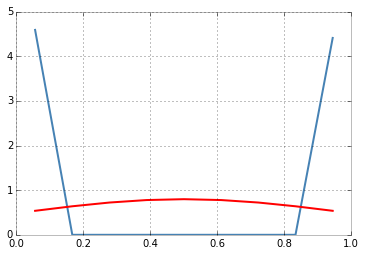

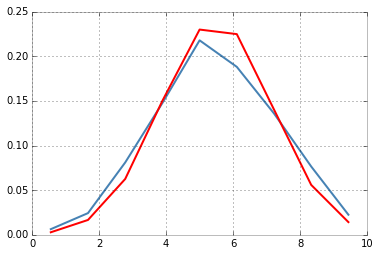

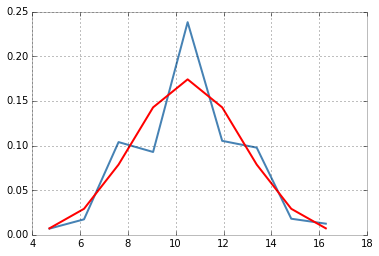

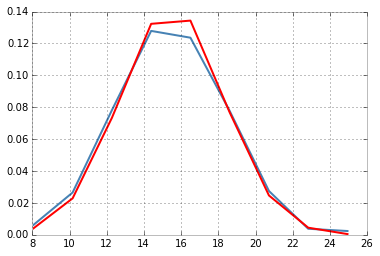

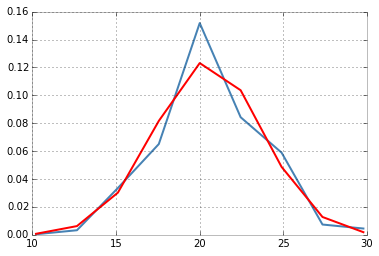

In [145]:
#p=0.5 is a "fair coin case": the most symmetric
p=0.5
for i,n in enumerate(narray):
    #generate the distribution
    dist = np.random.binomial(n, p, 1000)
    #run the tests. 
 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, np.sqrt(n*p*(1.0-p))))[0]

    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... just so you know.
    #if i%10 == 0: 
    #    print n
    #    pl.figure()
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, 1000*scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1-p)))
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins, density=True)[0], 
                                    scipy.stats.norm.pdf(bincenters, loc=n*p, 
                                                         scale=np.sqrt(n*p*(1.0-p))))
    chi2_b_all  = scipy.stats.chisquare(np.histogram(dist, bins=mybins, density=True)[0], 
                                       f_exp=scipy.stats.norm.pdf(bincenters, 
                                                                  loc=n*p, 
                                                                  scale=np.sqrt(n*p*(1.0-p))))
    chi2_b[i] = chi2_b_all[0]
    chi2_pv_b[i] = chi2_b_all[1]
    
    if ( i % 10) == 0:
        #every 10 loop steps (when i is exactlly divisible by 10 i plot the distributions 
        #fed to KL anc chisq, to be sure they look like they should) 
        pl.figure()
        #print bincenters, np.histogram(dist, bins=mybins, density=True)[0]
        pl.plot(bincenters, np.histogram(dist, bins=mybins, density=True)[0])
        pl.plot(bincenters, scipy.stats.norm.pdf(bincenters, loc=n*p, scale=np.sqrt(n*p*(1.0-p))), 'r')


#this is just one way to plot it. get creative and find the best way to show your result!
then give me a cell in which you write a caption for the figures you plot. think about how the captions are written in the paper  you have to read for this week assignment: a caption must describe the plot sufficiently well that i do not need to read the paper to understand it. though it will generally lack details of the how and why you see what you see. those are in the paper

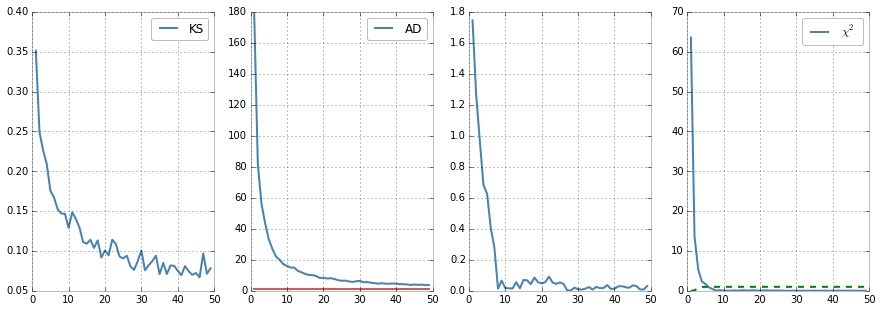

In [146]:

fig = pl.figure(figsize = (15,5))
fig.add_subplot(141)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(142)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(143)
pl.plot(narray, kl_b, label='K-L ')

fig.add_subplot(144)
pl.plot(narray, chi2_b, label=r'$\chi^2$ ')
pl.plot(narray, chi2_pv_b, 'g--')

pl.legend()

#Caption: (which is required and gradede!)  the statistics decrease and the Null hypothesis generally stated as "the distribution are similar"(and stated in detail for each distribution above)    is harder to reject as the sampel size increases. this is consistent with the Central limit theorem

#The threshold marked in red is the critical values for the test of a normal against a normal with n=1000 and alpha = 0.01, it is NOT the critical value at each iteration of the code, but it generally represents here a reference point. 

##a description is fine: if the KS test is not complying to what is expected because of the way we use the norm function you will not be penalized AS LONG AS YOU STATED THE INCONSISTENCY. this exercise is to navigate the difficulties of using a python package that is not well documented without being fooled by the output. 

#POISSON

now the standard deviation is sqrt(n) and the mean n, so args=(n, np.sqrt(n))

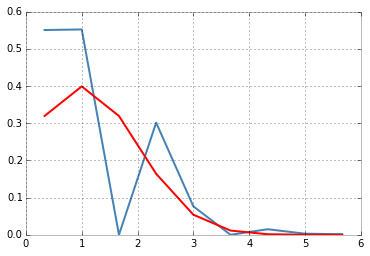

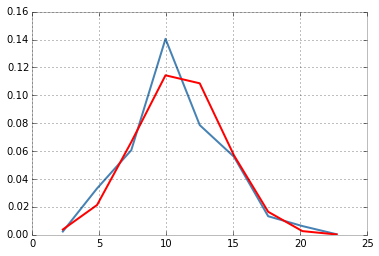

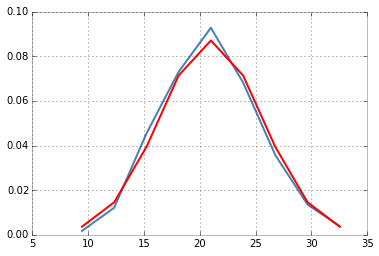

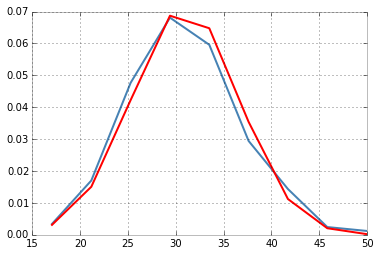

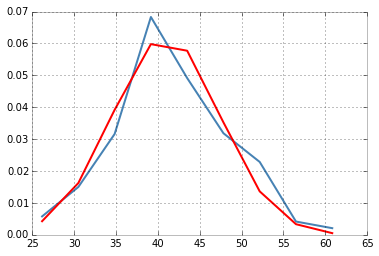

In [160]:


#to store the data i am generating an empty array of the size of the values of n i want to test. i do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, but default is float, which is fine by me, so i do not need any argument other then the lenght 
narray = range(1,50,1)
ks_p = np.zeros(len(narray))
ad_p = np.zeros(len(narray))
kl_p = np.zeros(len(narray))
chi2_p = np.zeros(len(narray))
chi2_pv_p = np.zeros(len(narray))

#then i put the tests in a for loop so that i can generate a distribution for given parameters once, 
#and run all tests against it
#now the valus that i want to plot depends on how i intend to describe the plot, and viceversa. 

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match

for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.poisson(n, 1000)
    #run the tests. 
    ks_p[i] = scipy.stats.kstest(dist, mynorm, args=(n, np.sqrt(n)))[0]
    ad_p[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
        
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_p [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n, scale=np.sqrt(n)))
    chi2_p_all  = scipy.stats.chisquare(np.histogram(dist, bins=mybins, density=True)[0], 
                                       f_exp = scipy.stats.norm.pdf(bincenters, 
                                                                  loc = n, 
                                                                  scale = np.sqrt(n)))
    chi2_p[i] = chi2_p_all[0]
    chi2_pv_p[i] = chi2_p_all[1]
    #print chi2_p_all[1]
    if ( i % 10) == 0:
        #every 10 loop steps (when i is exactlly divisible by 10 i plot the distributions 
        #fed to KL anc chisq, to be sure they look like they should) 
        pl.figure()
        #print bincenters, np.histogram(dist, bins=mybins, density=True)[0]
        pl.plot(bincenters, np.histogram(dist, bins=mybins, density=True)[0])
        pl.plot(bincenters, scipy.stats.norm.pdf(bincenters, loc=n, scale=np.sqrt(n)), 'r')


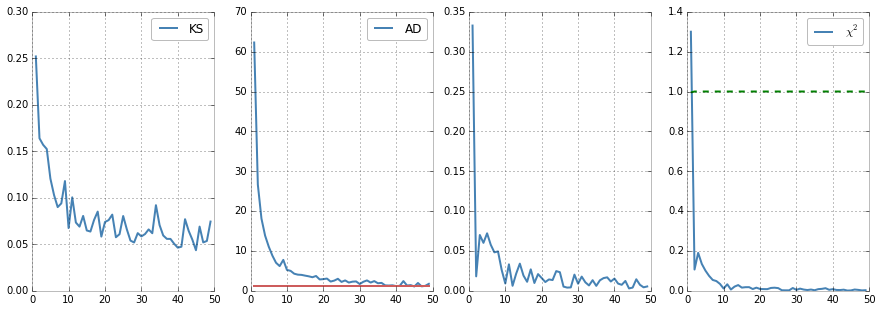

In [159]:

fig = pl.figure(figsize = (15,5))
fig.add_subplot(141)
pl.plot(narray, ks_p, label='KS')
pl.legend()

fig.add_subplot(142)
pl.plot(narray, ad_p,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(143)
pl.plot(narray, kl_p, label='K-L ')
fig.add_subplot(144)
pl.plot(narray, chi2_p, label=r'$\chi^2$')
pl.plot(narray, chi2_pv_p, 'g--')

pl.legend()

CAPTION: as before the tests indicate that the distributions converge to a normal for large sample sizes. (AD and KL more rapidy than KS) 

(this KS test works as well when the right scale (the standard deviation) is passed, while being n generall less powerful than the others (less difference and more noise). )

##TOTALLY OPTIONAL fun with KL: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other. you can see what it looks point by point, before you integrate and get a single distance number

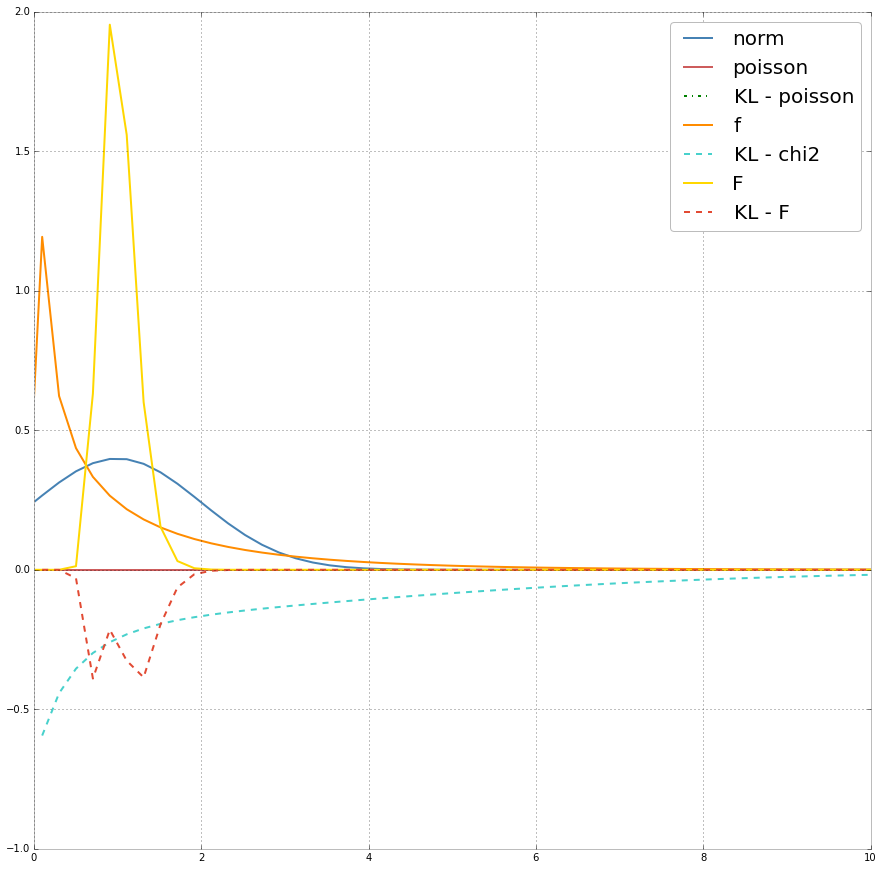